#### Oscar Bait Investigation Descriptive Statistics

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pickle as pkl
%matplotlib inline

df=pd.read_pickle("data/movie_data_clean.pickle")

print df.shape
print df.info()

(6797, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 0 to 6796
Data columns (total 19 columns):
budget               1338 non-null float64
genre                6797 non-null object
imdb_id              3999 non-null object
imdb_rating          3871 non-null float64
metascore            2960 non-null float64
oscar_noms           6797 non-null int64
oscar_wins           6797 non-null int64
plot                 3999 non-null object
rating               6795 non-null object
release_date         6797 non-null datetime64[ns]
release_year         6797 non-null int64
runtime              6574 non-null float64
title                6797 non-null object
tomato_meter         3130 non-null float64
tomato_user_meter    3622 non-null float64
counts               6797 non-null int64
genre_group          6778 non-null object
oscar_bait_genre     6797 non-null int64
release_qtr          6797 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6), object(6)
memory usage: 1.0

In [2]:
#Create 0-1 Indicator for Won any Oscars
df["oscar_noms_flag"]=0
df.ix[df.oscar_noms>0, "oscar_noms_flag"]=1

print pd.crosstab(df["oscar_noms"],df["oscar_noms_flag"])

oscar_noms_flag     0    1
oscar_noms                
0                6349    0
1                   0  252
2                   0   62
3                   0   32
4                   0   22
5                   0   26
6                   0   19
7                   0    6
8                   0   12
9                   0    5
10                  0    6
11                  0    2
12                  0    3
13                  0    1


In [3]:
#Define Crosstab and Oscar Plot Functions
def xtab(var1,var2):
    return pd.crosstab(df[var1], df[var2]).apply(lambda r: (r/r.sum())*100, axis=1)

def oscar_plot(df,width,xfont,yfont,xlabel):
    plt.bar([x for x in range(0,len(df.index))], df[1], width)
    plt.xticks([(x+(width/2)) for x in range(0,len(df.index))], df.index)
    plt.xlabel(xlabel, fontsize=yfont+4)
    plt.ylabel("Percent Nominated", fontsize=yfont+4)
    plt.title("Percent Nominated by "+xlabel, fontsize=yfont+8)
    
    plt.tick_params(axis="x",labelsize=xfont)
    plt.tick_params(axis="y",labelsize=yfont)

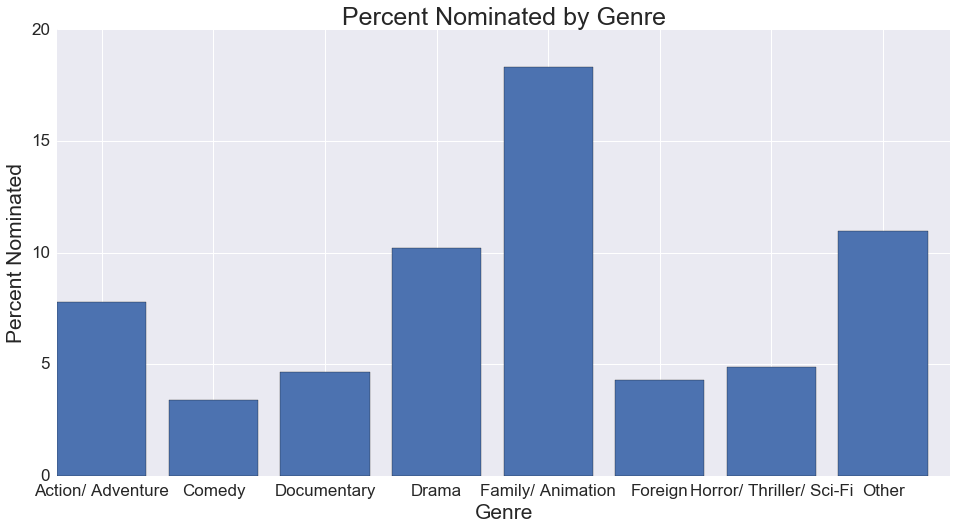

In [5]:
#Genre
genre_xtab=xtab("genre_group","oscar_noms_flag").sort_index(ascending=True)

plt.figure(figsize=(16,8))
oscar_plot(genre_xtab,0.8,17,17,"Genre")
plt.savefig("graphics/pct_nom_bygenre.png")

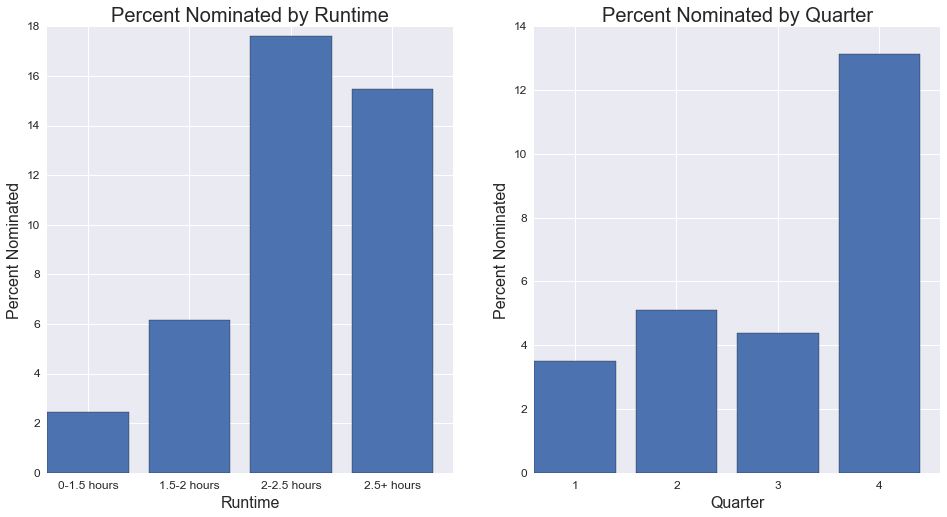

In [11]:
#Runtime & Quarterly Nominations
df["runtime_cat"]="0-1.5 hours"
df.ix[df.runtime.isnull(), "runtime_cat"]=np.nan
df.ix[df.runtime>90, "runtime_cat"]="1.5-2 hours"
df.ix[df.runtime>120, "runtime_cat"]="2-2.5 hours"
df.ix[df.runtime>150, "runtime_cat"]="2.5+ hours"

#print df["runtime_cat"].value_counts(sort=False, dropna=False)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
runtime_xtab=xtab("runtime_cat","oscar_noms_flag")
oscar_plot(runtime_xtab,0.8,12,12,"Runtime")

plt.subplot(1,2,2)
qtr_xtab=xtab("release_qtr","oscar_noms_flag")
oscar_plot(qtr_xtab,0.8,12,12,"Quarter")
plt.savefig("graphics/pct_nom_byrun_byqtr.png")

In [12]:
print df[["tomato_meter","tomato_user_meter"]].corr()

print df["tomato_meter"].describe()
print df["tomato_user_meter"].describe()

                   tomato_meter  tomato_user_meter
tomato_meter           1.000000           0.672578
tomato_user_meter      0.672578           1.000000
count    3130.000000
mean       55.573802
std        28.233070
min         0.000000
25%        32.000000
50%        58.000000
75%        81.000000
max       100.000000
Name: tomato_meter, dtype: float64
count    3622.000000
mean       58.821093
std        20.263114
min         0.000000
25%        44.000000
50%        60.000000
75%        75.000000
max       100.000000
Name: tomato_user_meter, dtype: float64


In [13]:
def bin_ratings(var,catvar):
    df[catvar]="0-25%"
    df.ix[df[var]>25, catvar]="26-50%"
    df.ix[df[var]>50, catvar]="51-75%"
    df.ix[df[var]>75, catvar]="75-100%"
    df.ix[df[var].isnull(), catvar]="n/a"
    
    print df[catvar].value_counts(sort=False, dropna=False)

bin_ratings("tomato_meter","tomato_meter_cat")
bin_ratings("tomato_user_meter","tomato_user_meter_cat")

0-25%       619
n/a        3667
75-100%     977
26-50%      713
51-75%      821
Name: tomato_meter_cat, dtype: int64
0-25%       211
n/a        3175
75-100%     863
26-50%     1042
51-75%     1506
Name: tomato_user_meter_cat, dtype: int64


In [14]:
df["aud_critic_diff"]=df.tomato_user_meter-df.tomato_meter

df["aud_critic_diff_cat"]="-100-25%"
df.ix[df.aud_critic_diff>-25, "aud_critic_diff_cat"]="-25-0% "
df.ix[df.aud_critic_diff>0, "aud_critic_diff_cat"]="0-25%"
df.ix[df.aud_critic_diff>25, "aud_critic_diff_cat"]="25-100%"
df.ix[df.aud_critic_diff.isnull(), "aud_critic_diff_cat"]="n/a"

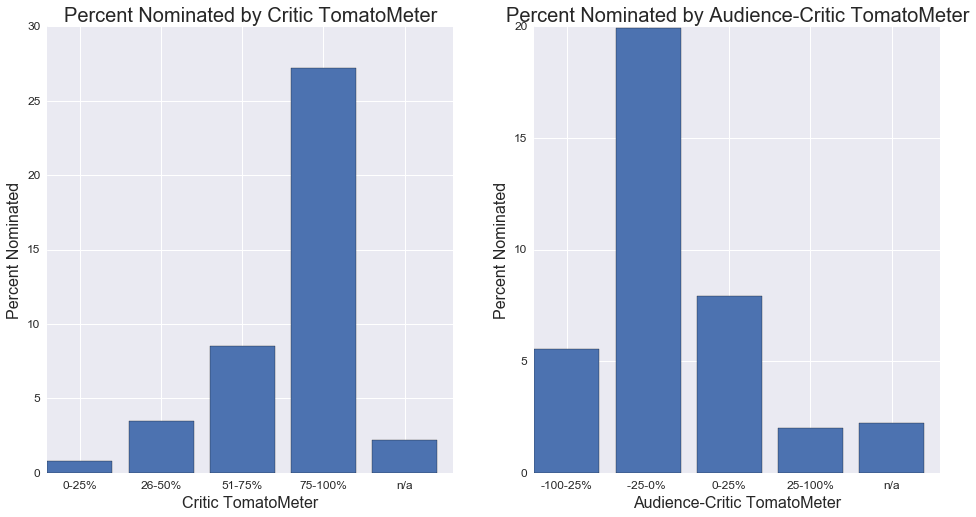

In [15]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
tomato_xtab=xtab("tomato_meter_cat","oscar_noms_flag")
oscar_plot(tomato_xtab,0.8,12,12,"Critic TomatoMeter")

plt.subplot(1,2,2)
diff_xtab=xtab("aud_critic_diff_cat","oscar_noms_flag").sort_index(ascending=True)
oscar_plot(diff_xtab,0.8,12,12,"Audience-Critic TomatoMeter")

plt.savefig("graphics/pct_nom_bycritic.png")

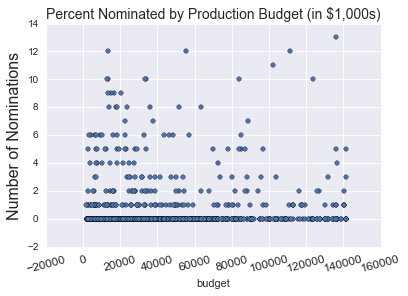

In [18]:
#Production Budget (after clean)
plt.figure(figsize=(20,10))
df.plot(x="budget",y="oscar_noms",kind="scatter")
plt.savefig("budget_scatter.png")
plt.xticks()
#plt.xlabel("Production Budget", fontsize=13)
plt.ylabel("Number of Nominations", fontsize=16)
plt.xticks(rotation=15)
plt.tick_params(axis="x",labelsize=12)
plt.tick_params(axis="y",labelsize=10)
plt.title("Percent Nominated by Production Budget (in $1,000s)",fontsize=14)
plt.savefig("graphics/pct_nomitated_x_budget.png")